# NAVDEEP MEHTA
## Coures = Internship at The Sparks Foundation
## Task = Exploratory Data Analysis - Retail
### E-mail = navdeepmehta884@gmail.com

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv(r'C:\Users\navde\Downloads\SampleSuperstore.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.shape

(9994, 13)

In [9]:
df.size

129922

In [10]:
df.duplicated().sum()

17

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.shape

(9977, 13)

In [13]:
temp=pd.DataFrame(index = df.columns)
temp['Data_Types'] = df.dtypes
temp['Null_Counts'] = df.isnull().sum()
temp['Unique_Counts'] = df.nunique()

In [14]:
temp

,Data_Types,Null_Counts,Unique_Counts
Ship Mode,object,0,4
Segment,object,0,3
Country,object,0,1
City,object,0,531
State,object,0,49
Postal Code,int64,0,631
Region,object,0,4
Category,object,0,3
Sub-Category,object,0,17
Sales,float64,0,5825


In [15]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


In [16]:
sns.set(style="whitegrid")

<AxesSubplot:>

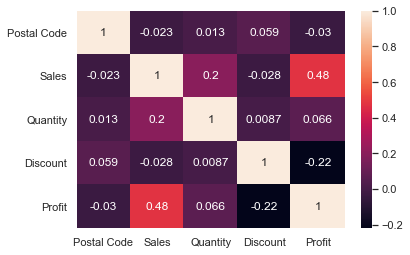

In [17]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Sales', ylabel='Count'>

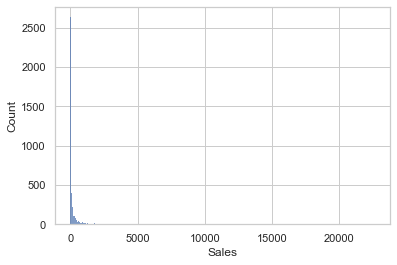

In [18]:
sns.histplot(x='Sales',data = df)

<AxesSubplot:xlabel='Profit', ylabel='Count'>

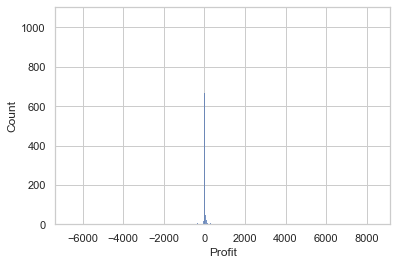

In [19]:
sns.histplot(x='Profit',data = df)

In [20]:
def remove_outlier(dataset,k):
    for col in dataset.columns:
            if (dataset[col].dtype=="int64" or dataset[col].dtype=="float64"):
                mean = dataset[col].mean()
                global df1      
                std = dataset[col].std()    
                outlier = [i for i in dataset[col] if (i > mean - k * std)]
                outlier = [i for i in outlier if (i < mean + k * std)]       
                df1 = dataset.loc[dataset[col].isin(outlier)]

In [21]:
remove_outlier(df,3.33)

In [22]:
df1.shape

(9889, 13)

In [23]:
df1.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [24]:
temp1=pd.DataFrame(index = df1.columns)
temp1['Data_Types'] = df1.dtypes
temp1['Null_Counts'] = df1.isnull().sum()
temp1['Unique_Counts'] = df1.nunique()

In [25]:
temp

,Data_Types,Null_Counts,Unique_Counts
Ship Mode,object,0,4
Segment,object,0,3
Country,object,0,1
City,object,0,531
State,object,0,49
Postal Code,int64,0,631
Region,object,0,4
Category,object,0,3
Sub-Category,object,0,17
Sales,float64,0,5825


In [26]:
temp1,temp

(             Data_Types  Null_Counts  Unique_Counts
 Ship Mode        object            0              4
 Segment          object            0              3
 Country          object            0              1
 City             object            0            531
 State            object            0             49
 Postal Code       int64            0            631
 Region           object            0              4
 Category         object            0              3
 Sub-Category     object            0             17
 Sales           float64            0           5748
 Quantity          int64            0             14
 Discount        float64            0             12
 Profit          float64            0           7204,
              Data_Types  Null_Counts  Unique_Counts
 Ship Mode        object            0              4
 Segment          object            0              3
 Country          object            0              1
 City             object            0        

<AxesSubplot:xlabel='Discount', ylabel='Sales'>

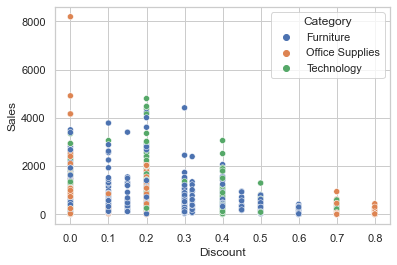

In [27]:
sns.scatterplot(x='Discount',y='Sales',data=df1,hue='Category')

<AxesSubplot:xlabel='Profit', ylabel='Sales'>

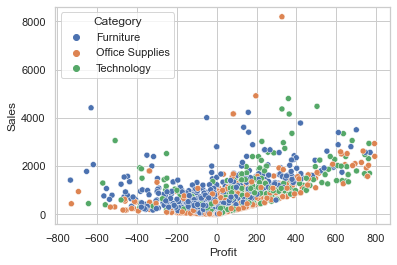

In [28]:
sns.scatterplot(x='Profit',y='Sales',data=df1,hue='Category')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

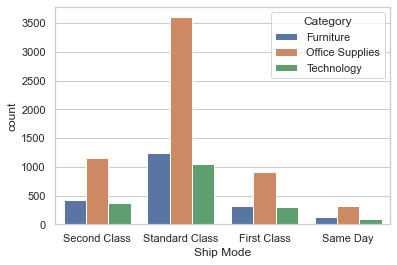

In [29]:
sns.countplot('Ship Mode',data=df1,hue='Category')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

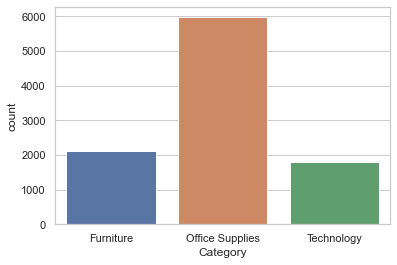

In [30]:
sns.countplot('Category',data=df1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

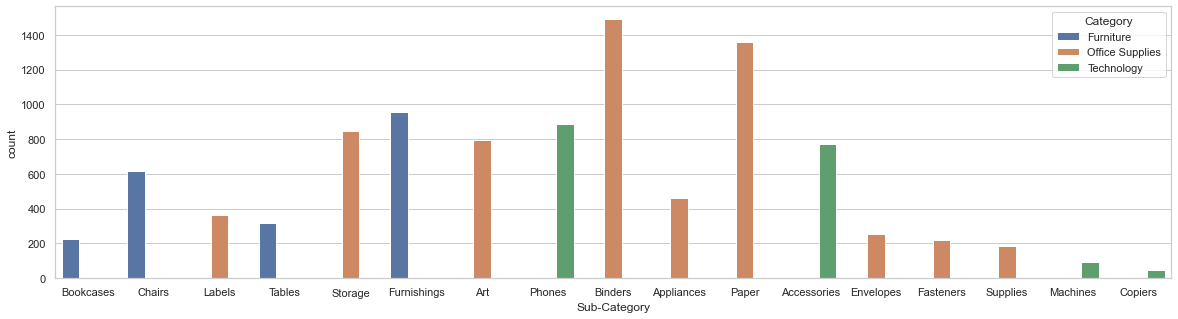

In [31]:
plt.figure(figsize=(20,5))
sns.countplot('Sub-Category',data=df1,hue='Category')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Segment', ylabel='count'>

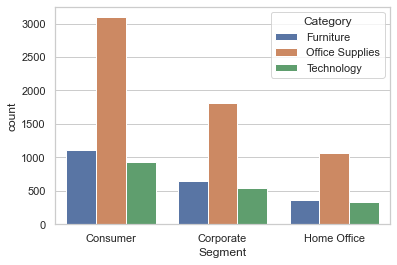

In [32]:
sns.countplot('Segment',data=df1,hue='Category')

In [33]:
df.groupby('State')['City'].value_counts()

State      City      
Alabama    Decatur       13
           Mobile        11
           Huntsville    10
           Montgomery    10
           Auburn         6
                         ..
Wisconsin  Wausau         4
           Appleton       2
           West Allis     2
           Waukesha       1
Wyoming    Cheyenne       1
Name: City, Length: 604, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity', ylabel='count'>

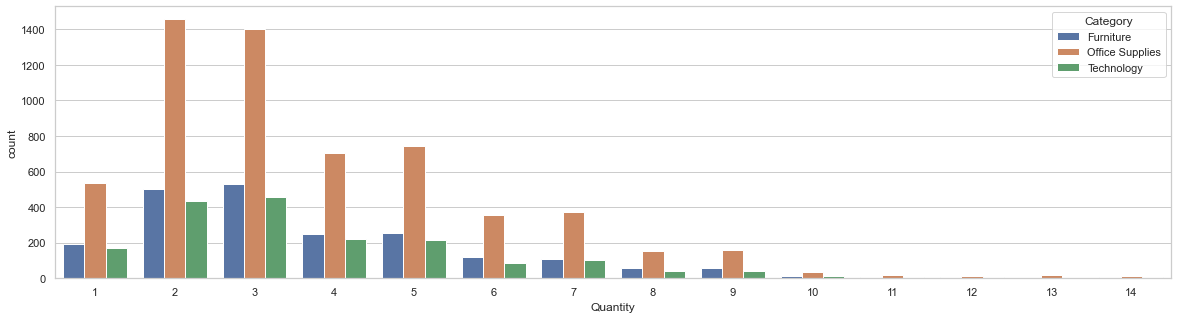

In [34]:
plt.figure(figsize=(20,5))
sns.countplot('Quantity',data=df1,hue='Category')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity', ylabel='count'>

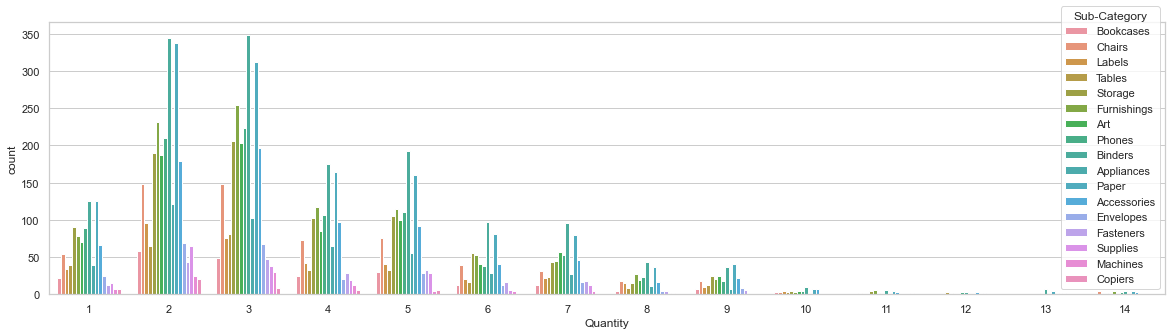

In [35]:
plt.figure(figsize=(20,5))
sns.countplot('Quantity',data=df1,hue='Sub-Category')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Region', ylabel='count'>

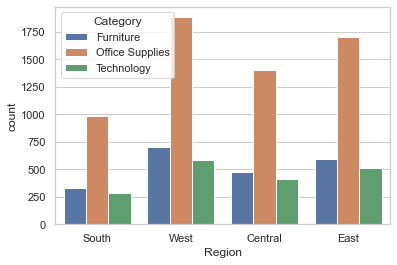

In [36]:
sns.countplot('Region',hue='Category',data=df1)

<AxesSubplot:xlabel='Category', ylabel='Profit'>

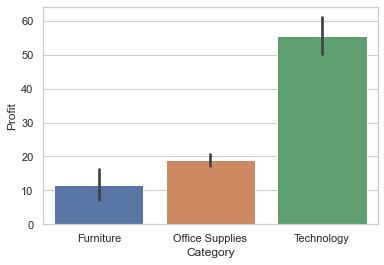

In [37]:
sns.barplot(x='Category',y='Profit',data=df1)

<AxesSubplot:xlabel='Category', ylabel='Sales'>

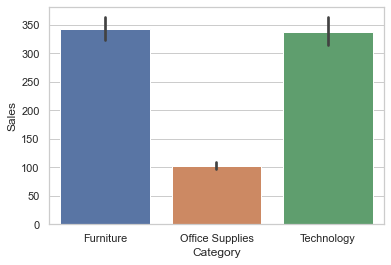

In [39]:
sns.barplot(x='Category',y='Sales',data=df1)

<AxesSubplot:xlabel='Region', ylabel='Profit'>

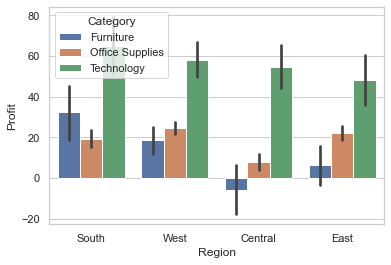

In [40]:
from numpy import mean
sns.barplot(x='Region',y='Profit',data=df1,hue='Category',estimator=mean)